In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Read in pizza.csv and print the first row.

In [2]:
df = pd.read_csv('pizza.csv')
df.iloc[0]

id                                                 AVwc_6KEIN2L1WUfrKAH
address                         Cascade Village Mall Across From Target
categories                                                  Pizza Place
city                                                               Bend
country                                                              US
keys                  us/or/bend/cascadevillagemallacrossfromtarget/...
latitude                                                      44.102665
longitude                                                   -121.300797
menuPageURL                                                         NaN
menus.amountMax                                                    22.5
menus.amountMin                                                    15.5
menus.currency                                                      USD
menus.dateSeen                                     2016-03-31T02:19:42Z
menus.description                                               

### Plot the top 10 most common pizzas.
Look at *menus.name*.

<AxesSubplot:>

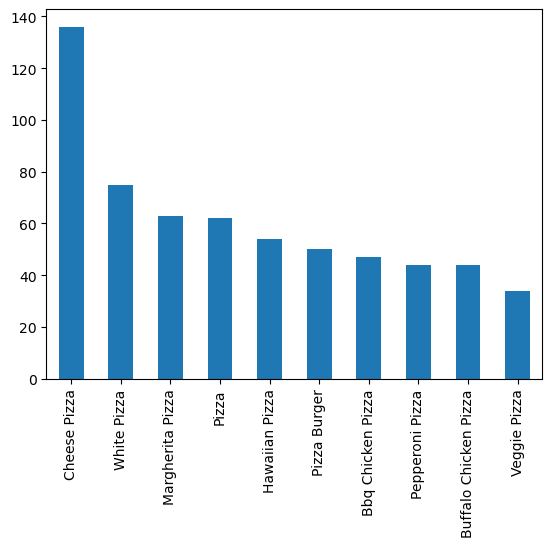

In [3]:
df['menus.name'].value_counts()[:10].plot(kind='bar')

### Plot the top 10 cities with the most pizza items.
The x-axis should be the city, and the y-axis the number of menu items that show up in this city (i.e., the number of rows corresponding to this city).

<AxesSubplot:>

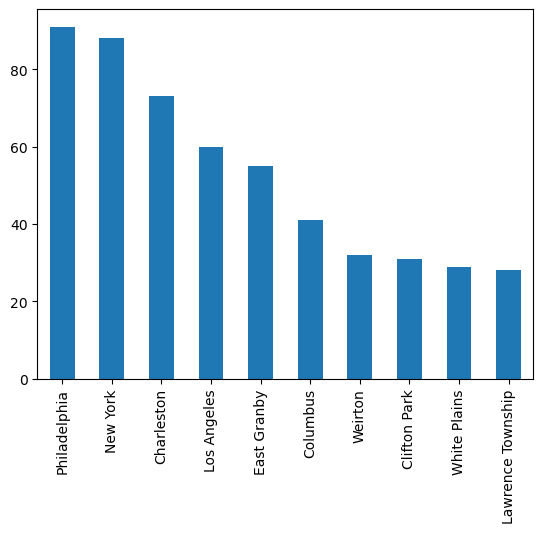

In [4]:
df['city'].value_counts()[:10].plot(kind='bar')

### Find the cheapest pizza (anywhere!)

Look at the *menus.amountMin* field, but ignore rows where *menus.amountMin = 0* (because there's no such thing as a free pizza; it's probably just missing data).

In [5]:
df[df['menus.amountMin'] > 0]\
    .sort_values(by='menus.amountMin').iloc[0]['menus.name']

'Cheese Pizza'

In [6]:
df2 = df[df['menus.amountMin'] > 0]
tmp = df2['menus.amountMin'].idxmin()
df2.loc[tmp]['menus.name']

'Cheese Pizza'

In [10]:
cheapest_price = df[ df['menus.amountMin'] > 0 ]['menus.amountMin'].min()
df[ df['menus.amountMin'] == cheapest_price ]['menus.name']

2773    Cheese Pizza
Name: menus.name, dtype: object

In [11]:
df[ df['menus.amountMin'] > 0 ].set_index('menus.name')['menus.amountMin'].idxmin()

'Cheese Pizza'

### Find the top 10 restaurants (or chains) with the biggest menus (i.e., they serve the most distinct pizzas).

A restaurant or a chain has a *name*, and serves a pizza of type *menus.name*. You want to count the number of unique *menus.name* for each *name*, and pick the top 10 *names* with the most menu options.

Note: You may see multiple rows where **name = Sicilia's Pizza** (say) and **menus.name = Cheese Pizza**. This probably means Sicilia's pizza is a chain. We **don't** want to count Cheese Pizza twice when counting the menu size for Sicilia's Pizza.

In [7]:
df[['name', 'menus.name']]\
    .drop_duplicates()['name'].value_counts()[:10]

J & G Restaurant           55
The Pizza Joint            36
Sicilia's Pizzeria         32
Labella Pizza and Pasta    31
Giovanni's Pizzeria        28
Takka Grill                26
North End Pizzeria         25
Stone and Paddle           22
Hungry Howie's Pizza       20
Pronto Pizza               19
Name: name, dtype: int64

### How many unique restaurant names have a menuPageURL that is not missing?

In [8]:
len(df[df['menuPageURL'].notnull()]['name'].value_counts())

124

### Check if any postalCode is associated with multiple provinces.

The "province" is the state code, while the postalCode is the zipcode. We don't expect any zipcode to cross state boundaries, but how would you check it?

In [9]:
z = df[['postalCode', 'province']].drop_duplicates()['postalCode'].value_counts()
z[z>1]

Series([], Name: postalCode, dtype: int64)